In [1]:
! pip install keras
! pip install huggingface_hub

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt
from huggingface_hub import from_pretrained_keras # download the model
import keras # deep learning
import os
from PIL import Image, ImageOps # Image processing
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('../input/cv-2022-project-scene-understanding/Train-20220409T231819Z-001/Train/Images'):
  #  for filename in filenames:
      #  print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
model = from_pretrained_keras("keras-io/lowlight-enhance-mirnet", compile=False)

config.json not found in HuggingFace Hub


Downloading:   0%|          | 0.00/1.25k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.67k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.45M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/481k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.56M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/17.5k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.19M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.1M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/14.0M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/437M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/219k [00:00<?, ?B/s]

2022-05-06 23:37:44.493757: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-06 23:37:44.494980: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-06 23:37:44.495748: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-06 23:37:44.496591: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [4]:
TrainImageLabels = pd.read_csv('../input/cv-2022-project-scene-understanding/TrainImageLabels.csv')
TestImageLabels = pd.read_csv('../input/cv-2022-project-scene-understanding/TestImageLabels.csv')

In [5]:
image = cv2.imread('../input/cv-2022-project-scene-understanding/Train-20220409T231819Z-001/Train/Images/2019_00001.png')
print(image.shape)
image = Image.fromarray(image)
image = image.resize((256,256),Image.NEAREST)
image = keras.preprocessing.image.img_to_array(image)
image = image.astype('float32') / 255.0
image = np.expand_dims(image, axis = 0)
output = model.predict(image) # model inference to enhance the low light pics
output_image = output[0] * 255.0
output_image = output_image.clip(0,255)
output_image = output_image.reshape((np.shape(output_image)[0],np.shape(output_image)[1],3))
output_image = np.uint32(output_image)
output_image =Image.fromarray(output_image.astype('uint8'),'RGB')
a=output_image
output_image.save(".//converted.png", format="png")

(375, 500, 3)


2022-05-06 23:38:29.917802: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-05-06 23:38:35.864521: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


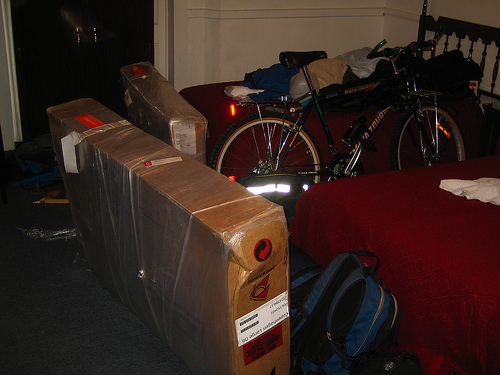

In [6]:
low_light_img=Image.open("../input/cv-2022-project-scene-understanding/Train-20220409T231819Z-001/Train/Images/2019_00001.png")#.convert('L')
low_light_img

In [7]:
im=cv2.imread("../input/cv-2022-project-scene-understanding/Train-20220409T231819Z-001/Train/Images/2019_00001.png")
print(np.shape(im))


(375, 500, 3)


In [8]:
trianing_image=[]
img_name =[]
dir_path = '../input/cv-2022-project-scene-understanding/Train-20220409T231819Z-001/Train/Images'
for file_name in os.listdir(dir_path):
    for i in range(len(TrainImageLabels)):
        img_name.append(file_name)
        if img_name == TrainImageLabels["ImageName"][i]:
            low_light_img = Image.open(dir_path+'/'+file_name)
            trianing_image=trianing_image.append([low_light_img,TrainImageLabels["LightType"][i]])
    
  

In [9]:
dir_path = '../input/cv-2022-project-scene-understanding/Train-20220409T231819Z-001/Train/Images'
for file_name ,i in zip(os.listdir(dir_path),range(len(TrainImageLabels))):


SyntaxError: unexpected EOF while parsing (871941719.py, line 2)

In [ ]:
low_light_img

In [ ]:
i=[]
dir_path = '../input/cv-2022-project-scene-understanding/Train-20220409T231819Z-001/Train/Images'
for file_name in os.listdir(dir_path):
    img_name.append(file_name)
    if file_name ==
    low_light_img = Image.open(dir_path+'/'+file_name)
    i.append(low_light_img)
#low_light_img = Image.open('../input/cv-2022-project-scene-understanding/Train-20220409T231819Z-001/Train/Images/2019_00001.png').convert('RGB')

In [ ]:
low_light_img = low_light_img.resize((256,256),Image.NEAREST)
image = keras.preprocessing.image.img_to_array(low_light_img)
image = image.astype('float32') / 255.0
image = np.expand_dims(image, axis = 0)
output = model.predict(image) # model inference to enhance the low light pics
output_image = output[0] * 255.0
output_image = output_image.clip(0,255)
output_image = output_image.reshape((np.shape(output_image)[0],np.shape(output_image)[1],3))
output_image = np.uint32(output_image)
im =Image.fromarray(output_image.astype('uint8'),'RGB')


In [ ]:
img_name =[]
images=[]
enhanced_images=[]
img_height = []
img_width = []
img_channel =[]
dir_path = '../input/cv-2022-project-scene-understanding/Train-20220409T231819Z-001/Train/Images'
for file_name in os.listdir(dir_path):
    img_name.append(file_name)
    low_light_img = cv2.imread(dir_path+'/'+file_name) 
    images.append(low_light_img)

    low_light_img = Image.fromarray(low_light_img)

#     low_light_img = Image.open(dir_path+'/'+file_name)
    low_light_img = low_light_img.resize((256,256),Image.NEAREST)
    image = keras.preprocessing.image.img_to_array(low_light_img)
    image = image.astype('float32') / 255.0
    image = np.expand_dims(image, axis = 0)
    output = model.predict(image) # model inference to enhance the low light pics
    output_image = output[0] * 255.0
    output_image = output_image.clip(0,255)
    output_image = output_image.reshape((np.shape(output_image)[0],np.shape(output_image)[1],3))
    output_image = np.uint32(output_image)
    output_image =Image.fromarray(output_image.astype('uint8'),'RGB')
    enhanced_images.append(output_image)
    #img_height.append(img.shape[1])
    #img_width.append(img.shape[0])
    #img_channel.append(img.shape[2])
    #x = int(img.shape[0]/2)
    #y = int(img.shape[1]/2)
    output_image.save('./'+'/'+file_name, format="png")
    
    # the problem here  is the gray scalle images try to handle this problem

In [ ]:
enhanced_images[0]  # the problem here  is the gray scalle images try to handle this problem


In [ ]:
Image.fromarray(images[0])

In [ ]:
df = pd.DataFrame(enhanced_images)
df.to_csv('enhanced_images.csv')

In [ ]:
directory = "./"
os.chdir(directory)
filename = 'savedImage.jpg'
  
# Using cv2.imwrite() method
# Saving the image
cv2.imwrite(filename, enhanced_images[0])